# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* https://laurentperrinet.github.io/sciblog/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* https://laurentperrinet.github.io/sciblog/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from shl_scripts import SHL_set
tag = 'eHAP'
experiments = SHL_set({})

In [4]:
%%writefile {experiments.shl.cache_dir}/{tag}.py

import numpy as np
np.set_printoptions(precision=2, suppress=True)

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'
try:
    n_jobs = sys.argv[2]
except:
    n_jobs = 1
    n_jobs = 4
    n_jobs = 9
    n_jobs = 10
    n_jobs = 35

from shl_scripts.shl_experiments import SHL_set
tag = 'eHAP'
opts = dict(homeo_method=tag, verbose=0)

experiments = SHL_set(opts, tag=tag)

variables = ['eta']
variables = ['eta', 'alpha_homeo']
variables = ['eta', 'eta_homeo', 'alpha_MP', 'eta_precision', ]
variables = ['eta', 'eta_homeo', 'alpha_homeo', 'alpha_MP']
variables = ['eta', 'eta_homeo', 'alpha_homeo', 'l0_sparseness']
# variables = ['eta', 'eta_homeo', 'alpha_homeo']

list_figures = []
list_figures = ['show_dico', 'show_Pcum']
list_figures = ['show_dico', ]

display_variables = ['error', 'logL', 'perror', 'aerror', 'MI', 'cputime', 'F']
display_variables = ['error', 'qerror', 'F']

if command == 'run':
    experiments.run(variables=variables, n_jobs=n_jobs)

if command == 'plot':
    import matplotlib.pyplot as plt
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable=variable, list_figures=list_figures, display='', fig_kwargs={'dim_graph':(2, 15)}, verbose=1)
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting cache_dir/eHAP.py


In [5]:
%run {experiments.shl.cache_dir}/{tag}.py load

In [6]:
!ls -l {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff     1891 Jul 19 09:25 cache_dir/eHAP.py
-rw-r--r--  1 laurentperrinet  staff  7589090 Jul 19 08:56 cache_dir/eHAP_alpha_homeo=0.62500_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  7589090 Jul 19 08:57 cache_dir/eHAP_alpha_homeo=0.88388_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  7589090 Jul 19 08:56 cache_dir/eHAP_alpha_homeo=1.25000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  7589090 Jul 19 08:53 cache_dir/eHAP_alpha_homeo=1.76777_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  7589090 Jul 19 08:57 cache_dir/eHAP_alpha_homeo=10.00000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  7589090 Jul 19 08:55 cache_dir/eHAP_alpha_homeo=2.50000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  7589090 Jul 19 08:57 cache_dir/eHAP_alpha_homeo=3.53553_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  7589090 Jul 19 08:54 cache_dir/eHAP_alpha_homeo=5.00000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  7589090 Jul 19 08:56 cache_dir/eHAP_alpha_homeo=7.07107_dico

In [7]:
%run {experiments.shl.cache_dir}/{tag}.py run

[Parallel(n_jobs=35)]: Using backend LokyBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=35)]: Done   2 out of  27 | elapsed:    2.8s remaining:   34.8s
[Parallel(n_jobs=35)]: Done   4 out of  27 | elapsed:    2.8s remaining:   16.1s
[Parallel(n_jobs=35)]: Done   6 out of  27 | elapsed:    2.8s remaining:    9.9s
[Parallel(n_jobs=35)]: Done   8 out of  27 | elapsed:    2.8s remaining:    6.7s
[Parallel(n_jobs=35)]: Done  10 out of  27 | elapsed:    2.8s remaining:    4.8s
[Parallel(n_jobs=35)]: Done  12 out of  27 | elapsed:    2.8s remaining:    3.6s
[Parallel(n_jobs=35)]: Done  14 out of  27 | elapsed:    2.9s remaining:    2.7s
[Parallel(n_jobs=35)]: Done  16 out of  27 | elapsed:    2.9s remaining:    2.0s
[Parallel(n_jobs=35)]: Done  18 out of  27 | elapsed:    2.9s remaining:    1.5s
[Parallel(n_jobs=35)]: Done  20 out of  27 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=35)]: Done  22 out of  27 | elapse

Running variable eta with value 0.0013


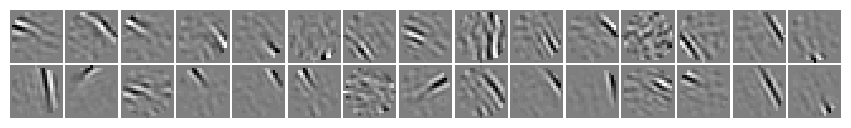

Running variable eta with value 0.0018


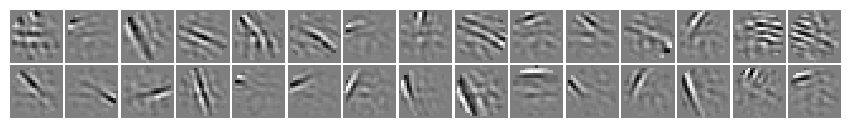

Running variable eta with value 0.0025


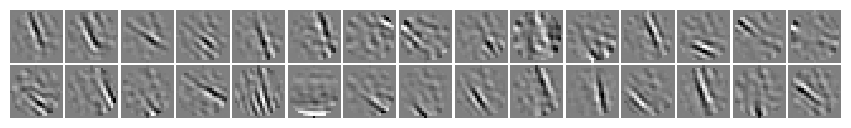

Running variable eta with value 0.0035


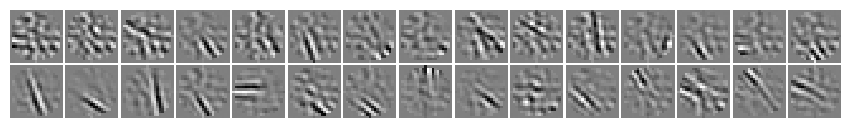

Running variable eta with value 0.0050


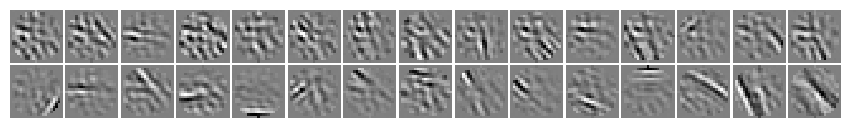

Running variable eta with value 0.0071


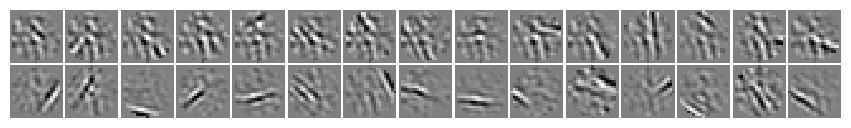

Running variable eta with value 0.0100


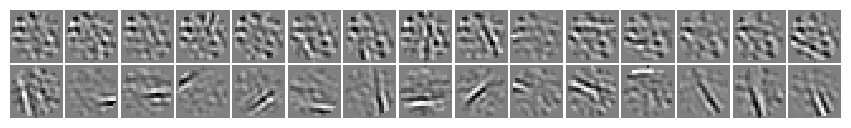

Running variable eta with value 0.0141


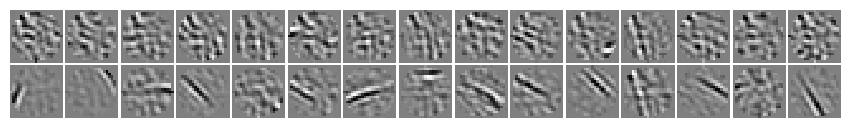

Running variable eta with value 0.0200


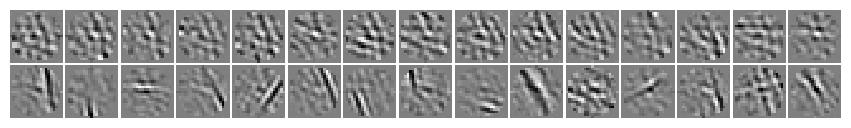

Time evolution of  error


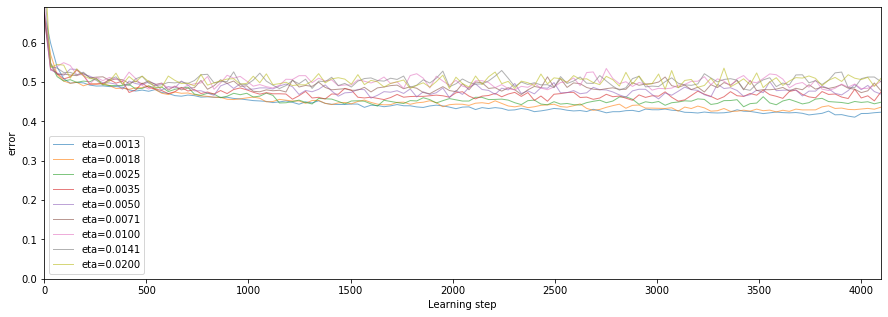

Time evolution of  qerror


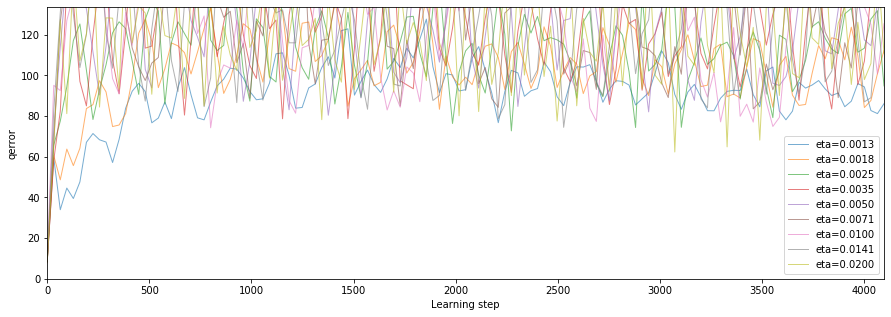

Time evolution of  F


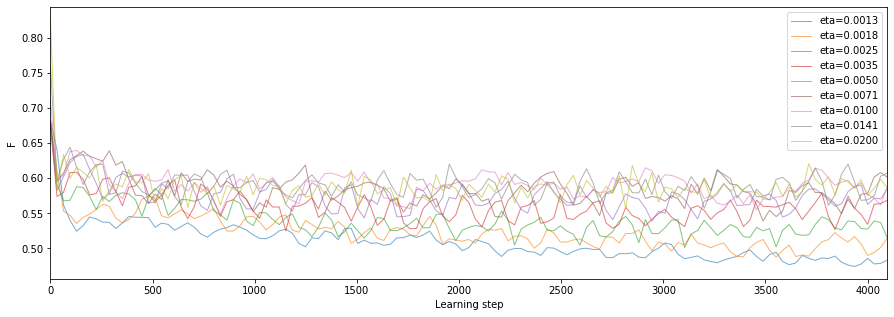

Comparison at the end of learning for  error


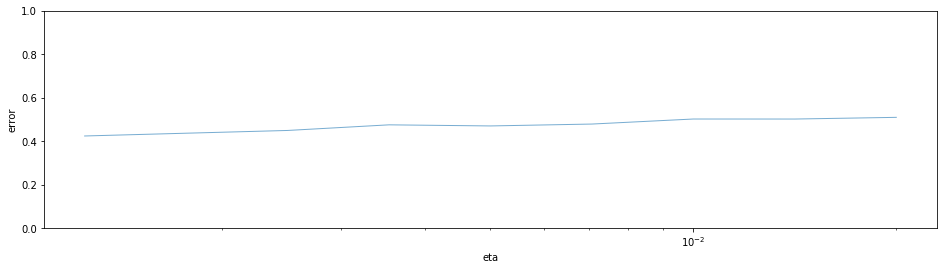

Comparison at the end of learning for  qerror


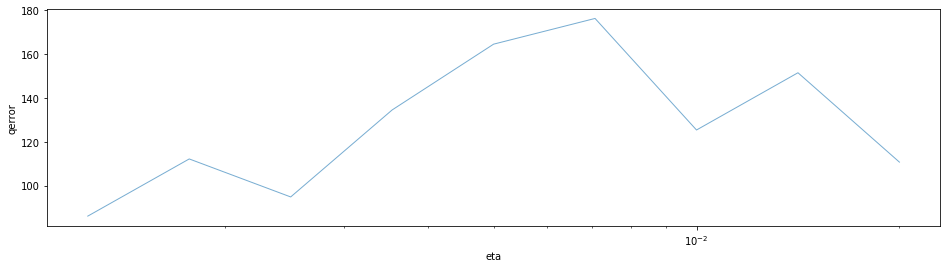

Comparison at the end of learning for  F


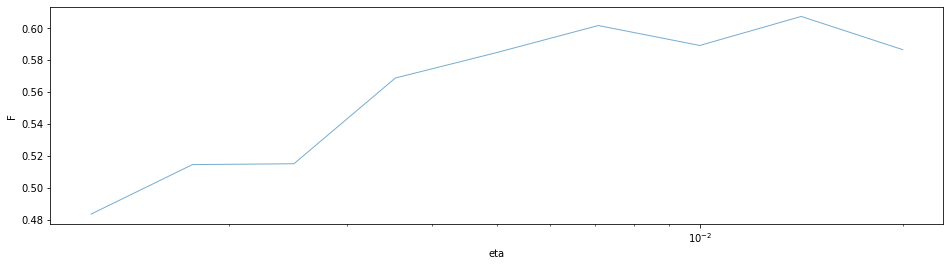

Running variable eta_homeo with value 0.0100


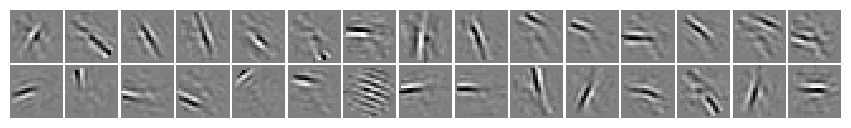

Running variable eta_homeo with value 0.0141


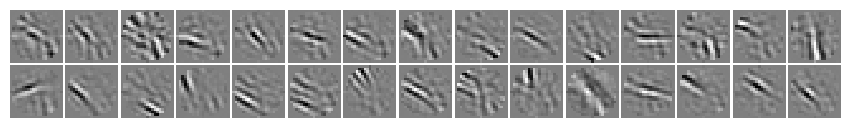

Running variable eta_homeo with value 0.0200


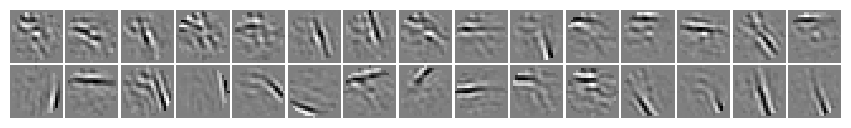

Running variable eta_homeo with value 0.0283


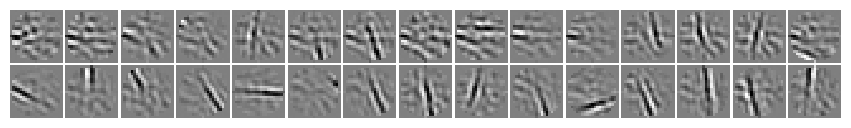

Running variable eta_homeo with value 0.0400


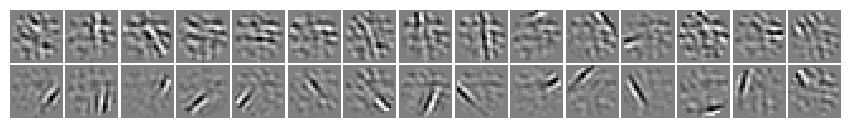

Running variable eta_homeo with value 0.0566


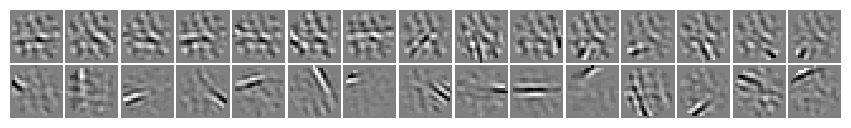

Running variable eta_homeo with value 0.0800


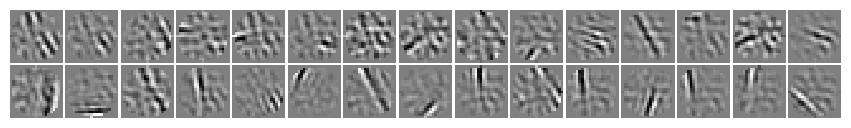

Running variable eta_homeo with value 0.1131


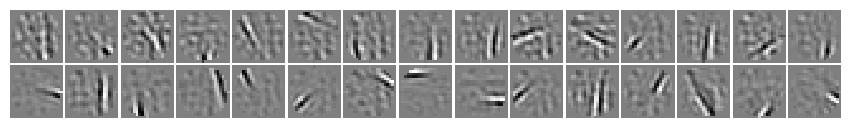

Running variable eta_homeo with value 0.1600


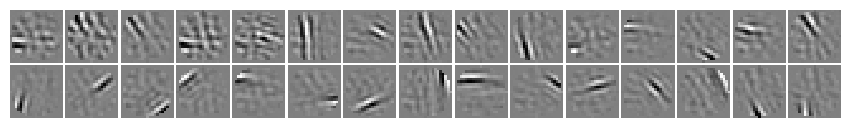

Time evolution of  error


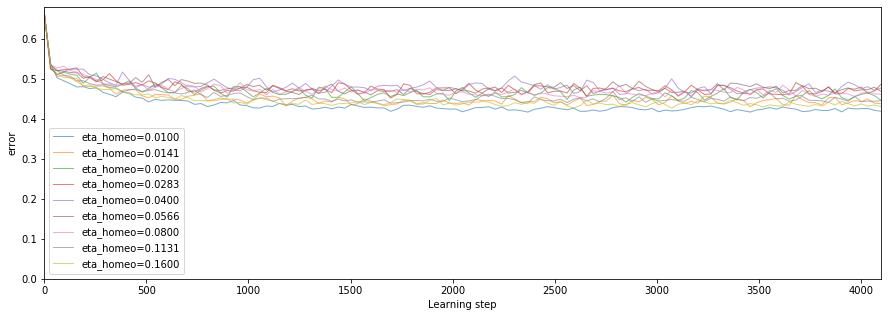

Time evolution of  qerror


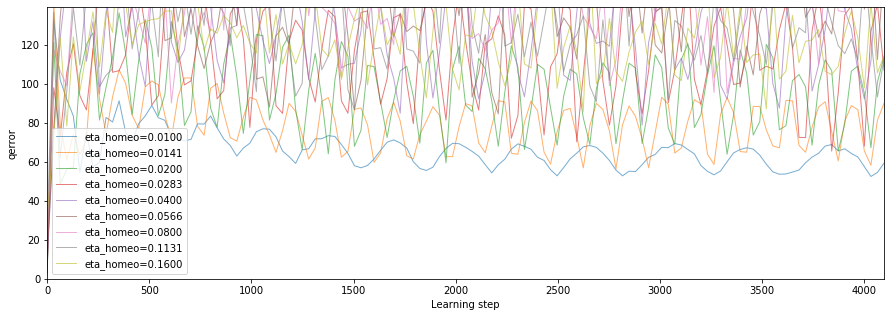

Time evolution of  F


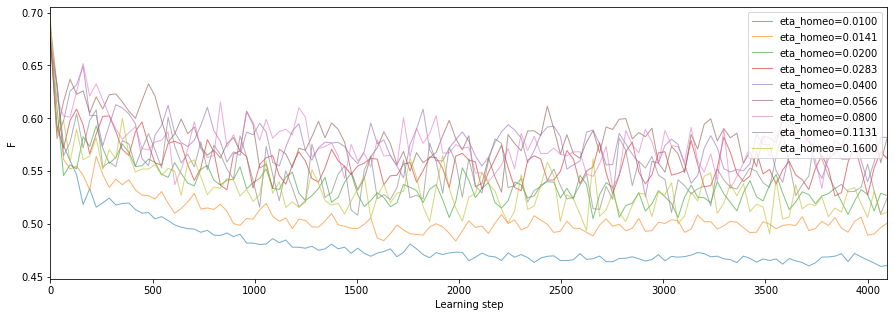

Comparison at the end of learning for  error


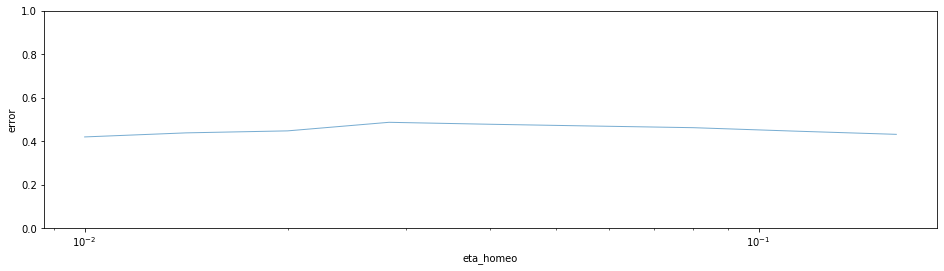

Comparison at the end of learning for  qerror


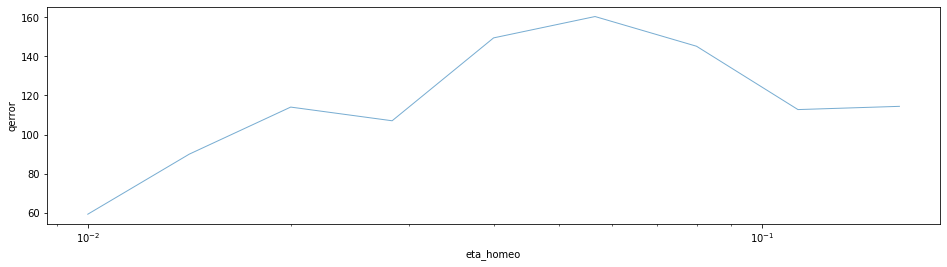

Comparison at the end of learning for  F


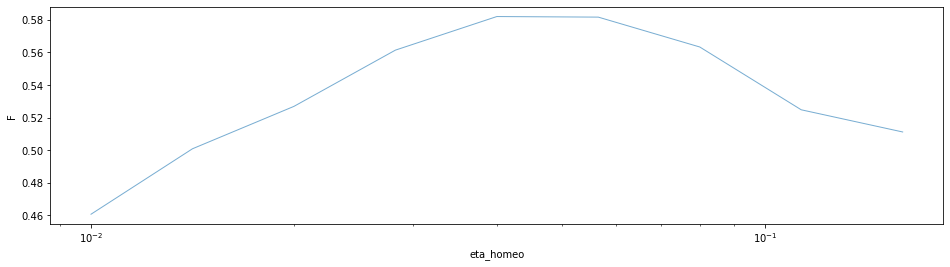

Running variable alpha_homeo with value 0.6250


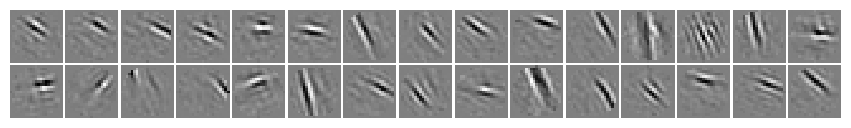

Running variable alpha_homeo with value 0.8839


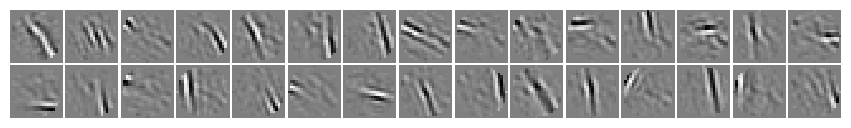

Running variable alpha_homeo with value 1.2500


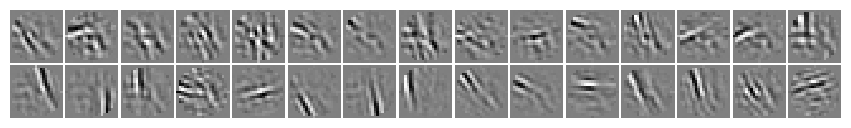

Running variable alpha_homeo with value 1.7678


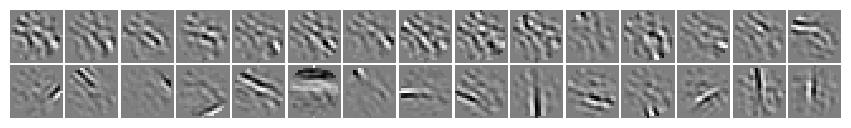

Running variable alpha_homeo with value 2.5000


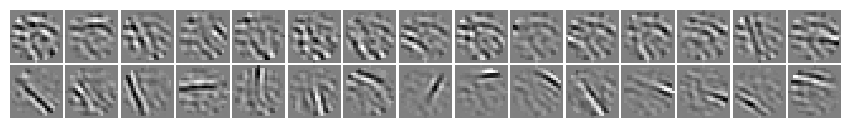

Running variable alpha_homeo with value 3.5355


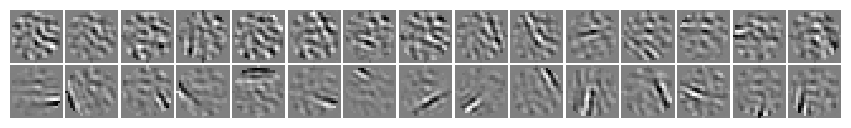

Running variable alpha_homeo with value 5.0000


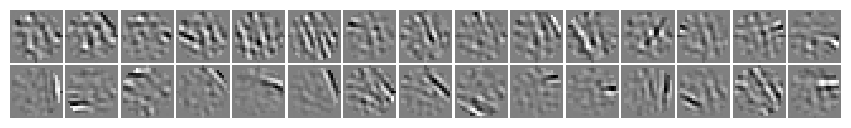

Running variable alpha_homeo with value 7.0711


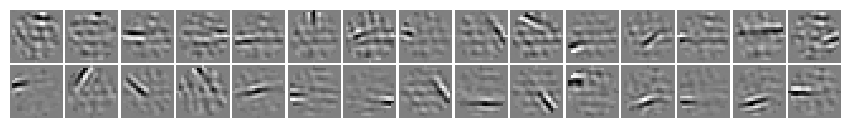

Running variable alpha_homeo with value 10.0000


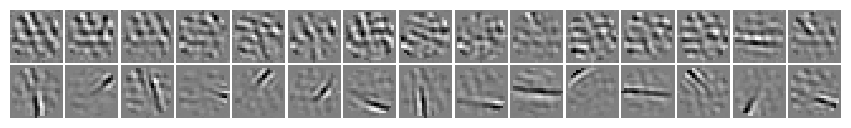

Time evolution of  error


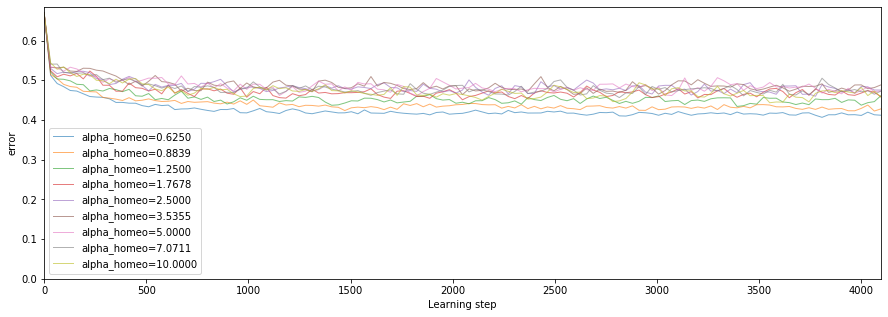

Time evolution of  qerror


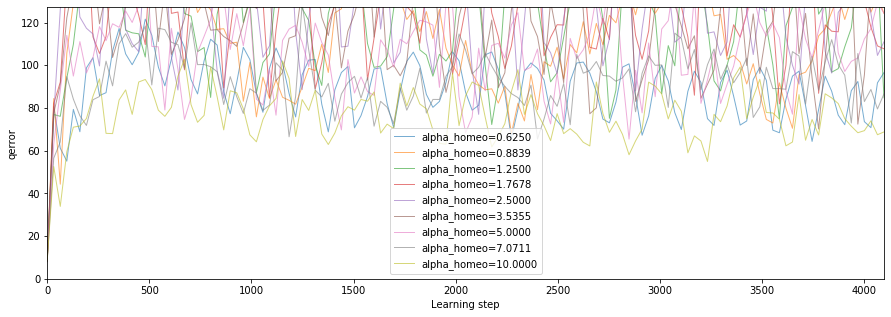

Time evolution of  F


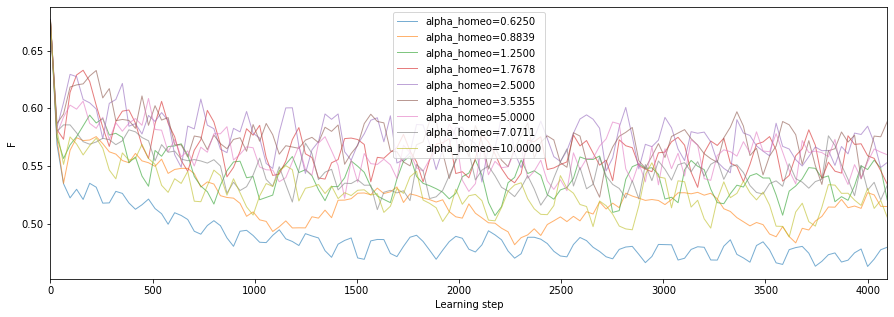

Comparison at the end of learning for  error


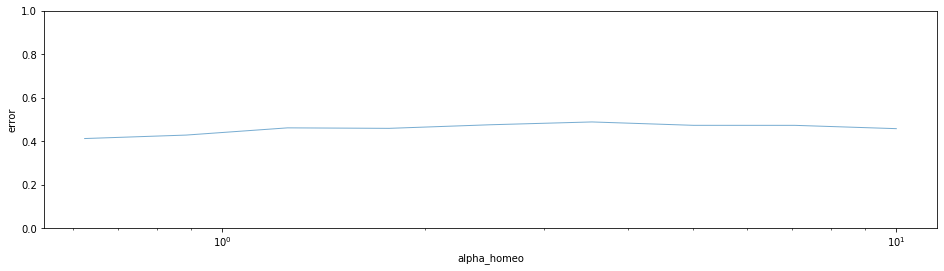

Comparison at the end of learning for  qerror


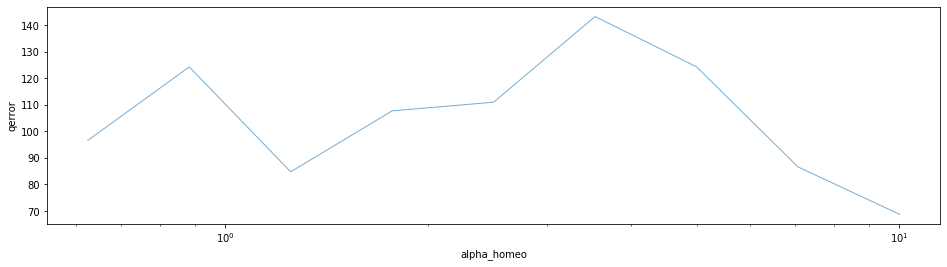

Comparison at the end of learning for  F


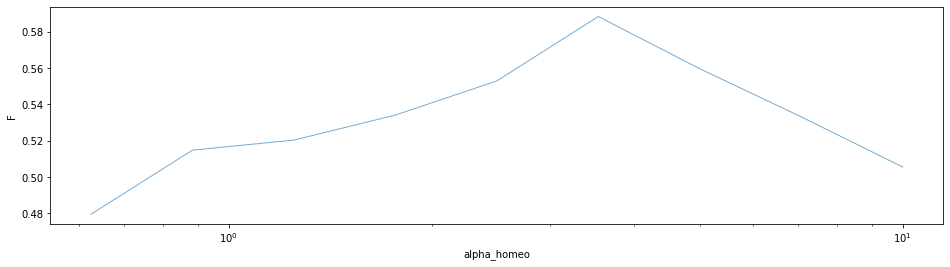

In [8]:
%run {experiments.shl.cache_dir}/{tag}.py plot

In [9]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.7.4 64bit [Clang 10.0.1 (clang-1001.0.46.4)]
IPython 7.6.1
OS Darwin 18.6.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.16.4
shl_scripts 20171221
pandas 0.24.2
matplotlib 3.1.1
Fri Jul 19 09:44:33 2019 CEST